# XGBoost with SKlearn

In [1]:
import multiprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import DMatrix, train

In [2]:
# Plot styles
# plt.style.use('seaborn-v0_8-darkgrid') 
plt.style.use('ggplot')
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('bmh')
# plt.style.use('seaborn-v0_8-pastel') # Softer colors
# plt.style.use('Solarize_Light2') # Light background, colorful elements

In [3]:
car_insurance_data = pd.read_csv('../data/car_insurance.csv')

In [4]:
car_insurance_data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [5]:
# Seperate features and target
X = car_insurance_data.drop('Insurance Premium ($)', axis=1)
y = car_insurance_data['Insurance Premium ($)']

In [6]:
# Create DMatrix from X and y
dmatrix = DMatrix(data=X, label=y)

In [7]:
# Set XGBoost Parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'random_state': 42
}

In [8]:
# Train the model
model = train(params, dmatrix)

## Plot Outcome

NameError: name 'predictions' is not defined

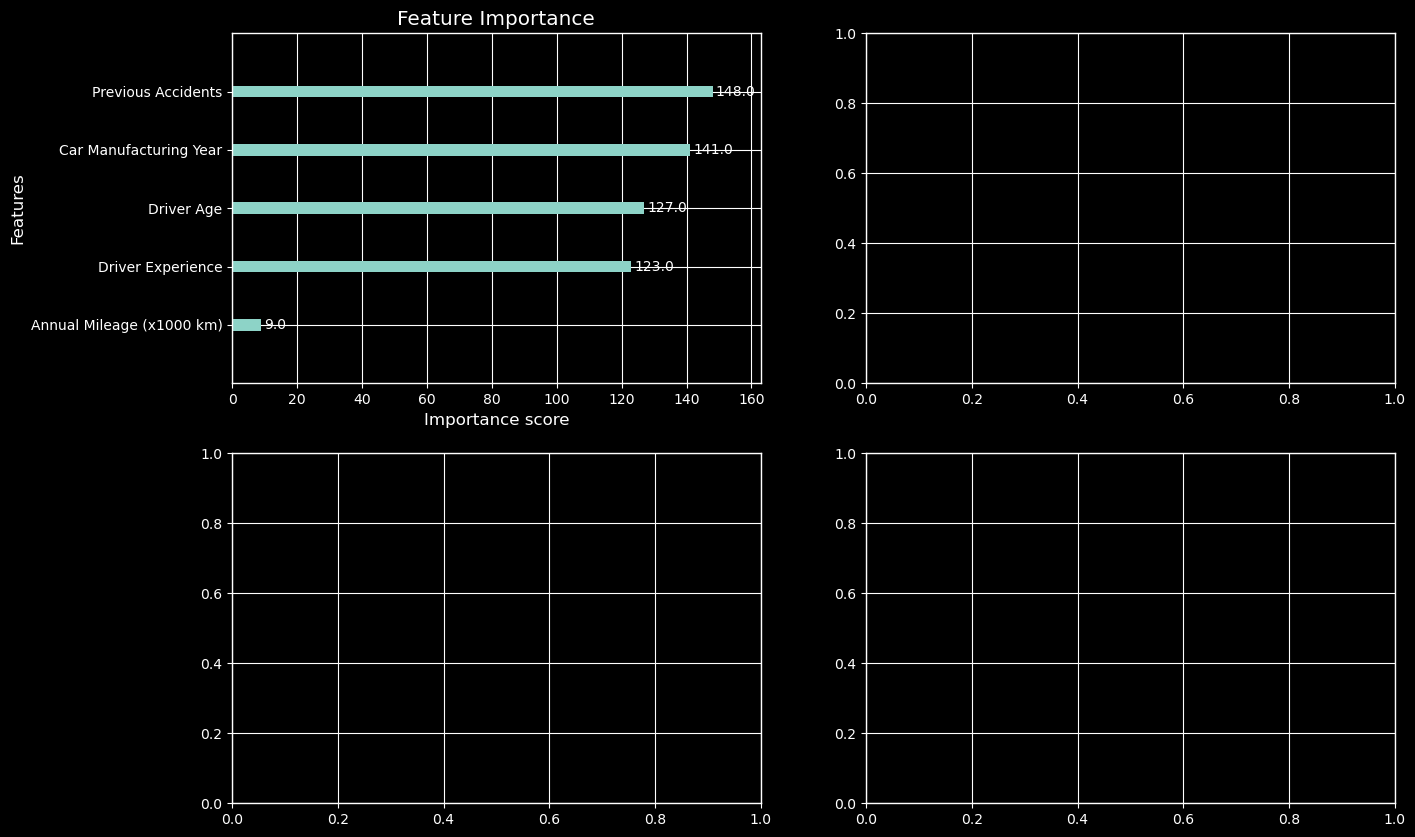

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Feature Importance Plot
xgb.plot_importance(model, ax=axes[0, 0]) # Pass the specific subplot axis
axes[0, 0].set_title('Feature Importance')

# Actual vs Predicted Values Plot
axes[0, 1].scatter(y, predictions, alpha=0.5)
axes[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title('Actual vs Predicted Values')

# Residuals Plot
axes[1, 0].scatter(predictions, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot')

# Distribution of Residuals
axes[1, 1].hist(residuals, bins=30, alpha=0.7)
axes[1, 1].set_xlabel('Residual Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()#
plt.show()